In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xlsxwriter
import pylab as pl
import matplotlib.ticker as ticker
from openpyxl import load_workbook
%matplotlib inline

In [2]:
data = pd.read_csv('TATN1day1.csv', sep = ',')
data.drop('<OPEN>', axis = 1, inplace = True)
data.drop('<HIGH>', axis = 1, inplace = True)
data.drop('<LOW>', axis = 1, inplace = True)
data.drop('<VOL>', axis = 1, inplace = True)
data.drop('<PER>', axis = 1, inplace = True)
data.drop('<TICKER>', axis = 1, inplace = True)
data.drop('<TIME>', axis = 1, inplace = True)
data['<DATE>'] = data['<DATE>'].astype('str')
data['<DATE>'] = pd.to_datetime(data['<DATE>'])
data

,<DATE>,<CLOSE>
0,2017-01-03,445.20
1,2017-01-04,446.40
2,2017-01-05,424.25
3,2017-01-06,423.45
4,2017-01-09,425.80
...,...,...
955,2020-10-16,429.20
956,2020-10-19,415.70
957,2020-10-20,421.20
958,2020-10-21,416.90


In [3]:
train = data[:750]
valid = data[750:]
data.shape,train.shape,valid.shape

((960, 2), (750, 2), (210, 2))

In [4]:
train['<DATE>'].min(), train['<DATE>'].max(), valid['<DATE>'].min(), valid['<DATE>'].max()

(Timestamp('2017-01-03 00:00:00'),
 Timestamp('2019-12-18 00:00:00'),
 Timestamp('2019-12-19 00:00:00'),
 Timestamp('2020-10-22 00:00:00'))

In [5]:
#Предсказание
preds = []
for i in range(0,210):
 a = train['<CLOSE>'][len(train)-210+i:].sum() + sum(preds)
 b = a/210
 preds.append(b)

In [6]:
#rmse или среднеквадратичная ошибка
rms=np.sqrt(np.mean(np.power((np.array(valid['<CLOSE>'])-np.array(preds)),2)))
rms

185.88367587312322

<ipython-input-7-483fa683bc44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-7-483fa683bc44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


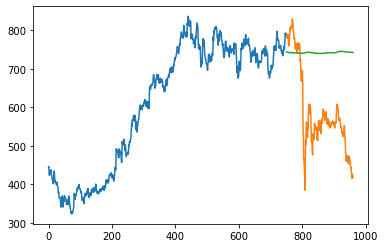

In [7]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['<CLOSE>'])
plt.plot(valid[['<CLOSE>', 'Predictions']])